In [4]:
%pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../data/raw/bike_buyers.csv')

df.shape

(1000, 13)

In [7]:
df.head(10)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [9]:
df.drop("ID", axis=1).describe()

,Income,Children,Cars,Age
count,994.000000,992.000000,991.000000,992.000000
mean,56267.605634,1.910282,1.455096,44.181452
std,31067.817462,1.626910,1.121755,11.362007
min,10000.000000,0.000000,0.000000,25.000000
25%,30000.000000,0.000000,1.000000,35.000000
50%,60000.000000,2.000000,1.000000,43.000000
75%,70000.000000,3.000000,2.000000,52.000000
max,170000.000000,5.000000,4.000000,89.000000


In [10]:
cat_cols = df.select_dtypes(include="object")

for col in cat_cols:
    df_var = pd.DataFrame(df[col].value_counts())
    df_var.columns = ["freq_abs"]

    df_var["freq_rel"] = df_var["freq_abs"]/len(df)
    df_var["freq_rel_%"] = df_var["freq_rel"]*100

    display(df_var)

,freq_abs,freq_rel,freq_rel_%
Marital Status,,,
Married,535,0.535,53.5
Single,458,0.458,45.8


,freq_abs,freq_rel,freq_rel_%
Gender,,,
Male,500,0.500,50.0
Female,489,0.489,48.9


,freq_abs,freq_rel,freq_rel_%
Education,,,
Bachelors,306,0.306,30.6
Partial College,265,0.265,26.5
High School,179,0.179,17.9
Graduate Degree,174,0.174,17.4
Partial High School,76,0.076,7.6


,freq_abs,freq_rel,freq_rel_%
Occupation,,,
Professional,276,0.276,27.6
Skilled Manual,255,0.255,25.5
Clerical,177,0.177,17.7
Management,173,0.173,17.3
Manual,119,0.119,11.9


,freq_abs,freq_rel,freq_rel_%
Home Owner,,,
Yes,682,0.682,68.2
No,314,0.314,31.4


,freq_abs,freq_rel,freq_rel_%
Commute Distance,,,
0-1 Miles,366,0.366,36.6
5-10 Miles,192,0.192,19.2
1-2 Miles,169,0.169,16.9
2-5 Miles,162,0.162,16.2
10+ Miles,111,0.111,11.1


,freq_abs,freq_rel,freq_rel_%
Region,,,
North America,508,0.508,50.8
Europe,300,0.300,30.0
Pacific,192,0.192,19.2


,freq_abs,freq_rel,freq_rel_%
Purchased Bike,,,
No,519,0.519,51.9
Yes,481,0.481,48.1


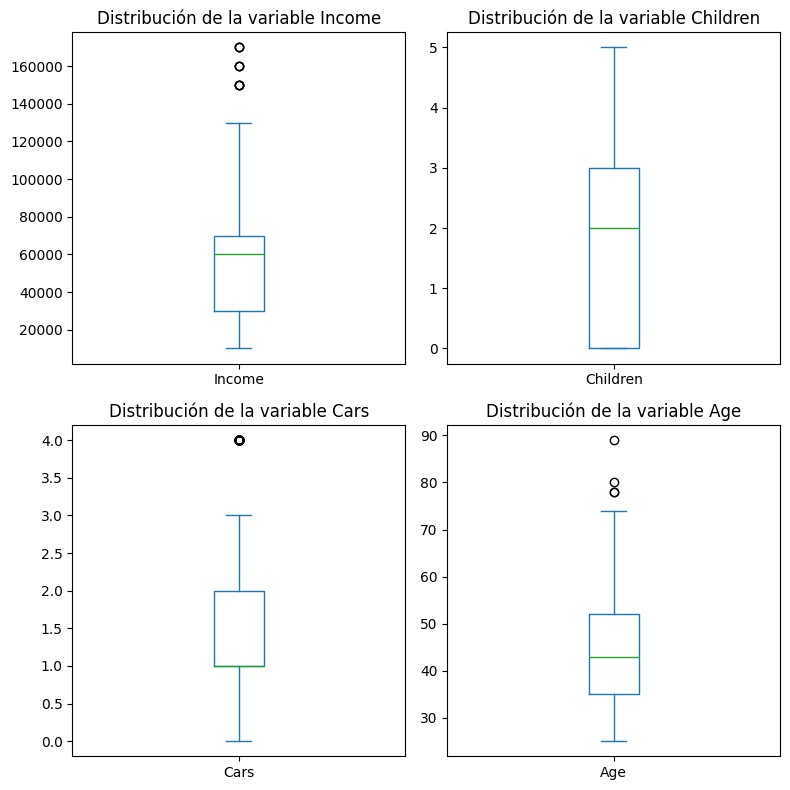

In [11]:
num_cols = df.select_dtypes(include=['int64', 'float64']).drop("ID", axis=1).columns.tolist()

n = len(num_cols)
ncols = 2
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(ncols=ncols,nrows=nrows,figsize=(4*ncols, 4*nrows))

axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]

for ax, col in zip(axes, num_cols):
    df[col].plot(kind='box', ax=ax)
    ax.set_title(f"Distribución de la variable {col}")


# hide any unused axes
for ax in axes[len(num_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

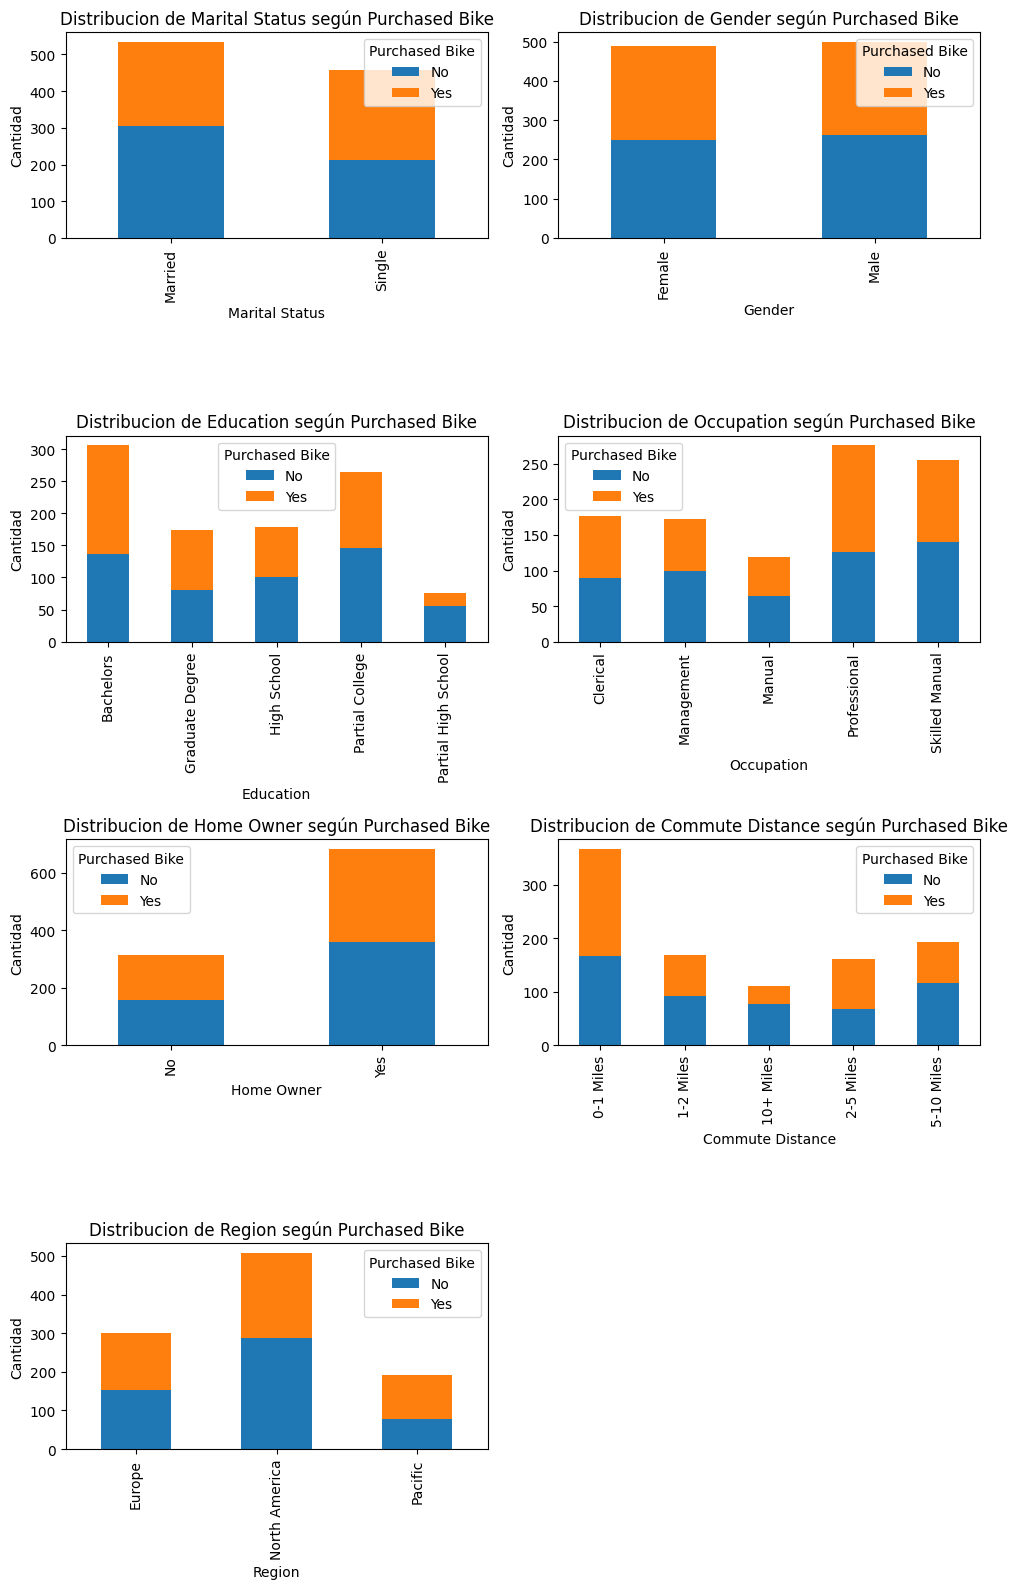

In [12]:

target_var = "Purchased Bike"
cat_cols = df.select_dtypes(include=['object']).drop(target_var, axis=1).columns.tolist()
# create a subplot grid that fits all categorical columns
n = len(cat_cols)
ncols = 2
nrows = (n + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))

# ensure axes is a flat array for easy indexing
axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]

for ax, col in zip(axes, cat_cols):
    crosstab_data = pd.crosstab(df[col], df[target_var])
    crosstab_data.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Distribucion de {col} según {target_var}')
    ax.set_xlabel(col)
    ax.set_ylabel('Cantidad')
    ax.legend(title=target_var)

# hide any unused axes
for ax in axes[len(cat_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [13]:
# Verificar la cantidad de valores na
df.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [14]:
df_clean = df.copy()

# Imputaremos valores usando SimpleImputer
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

# Separamos los tipos de valores
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include="object").columns

# Implementamos el imputador
df_clean[num_cols] = num_imputer.fit_transform(df_clean[num_cols])
df_clean[cat_cols] = cat_imputer.fit_transform(df_clean[cat_cols])

print("\nValores faltantes luego de la imputación")
print(df_clean.isna().sum())


Valores faltantes luego de la imputación
ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64


In [15]:
# Detectar outliers usando el método IQR para cada columna numérica
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).drop("ID", axis=1).columns.tolist()

print("=" * 50)
print("ANÁLISIS DE OUTLIERS (Método IQR)")
print("=" * 50)

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir límites
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)][col]
    
    print(f"\n{'=' * 50}")
    print(f"Columna: {col}")
    print(f"{'=' * 50}")
    print(f"Q1 (25%): {Q1}")
    print(f"Q3 (75%): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Límite inferior: {lower_bound}")
    print(f"Límite superior: {upper_bound}")
    print(f"Cantidad de outliers: {len(outliers)} ({len(outliers)/len(df_clean)*100:.2f}%)")

print("=" * 50)

ANÁLISIS DE OUTLIERS (Método IQR)

Columna: Income
Q1 (25%): 30000.0
Q3 (75%): 70000.0
IQR: 40000.0
Límite inferior: -30000.0
Límite superior: 130000.0
Cantidad de outliers: 10 (1.00%)

Columna: Children
Q1 (25%): 0.0
Q3 (75%): 3.0
IQR: 3.0
Límite inferior: -4.5
Límite superior: 7.5
Cantidad de outliers: 0 (0.00%)

Columna: Cars
Q1 (25%): 1.0
Q3 (75%): 2.0
IQR: 1.0
Límite inferior: -0.5
Límite superior: 3.5
Cantidad de outliers: 59 (5.90%)

Columna: Age
Q1 (25%): 35.0
Q3 (75%): 52.0
IQR: 17.0
Límite inferior: 9.5
Límite superior: 77.5
Cantidad de outliers: 4 (0.40%)


In [16]:
# Aplicar Winsorización usando método IQR (más efectivo)
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).drop(["ID", "Cars"], axis=1).columns.tolist()

print("Tratamiento de outliers con Winsorización (método IQR):")
print("="*60)

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers_before = ((df_clean[col] < lower) | (df_clean[col] > upper)).sum()
    
    df_clean[col] = np.clip(df_clean[col], lower, upper)
    
    outliers_after = ((df_clean[col] < lower) | (df_clean[col] > upper)).sum()
    
    print(f"{col}:")
    print(f"  Outliers antes: {outliers_before}")
    print(f"  Outliers después: {outliers_after}")
    print(f"  Límites: [{lower:.2f}, {upper:.2f}]")
    print()

print("="*60)

Tratamiento de outliers con Winsorización (método IQR):
Income:
  Outliers antes: 10
  Outliers después: 0
  Límites: [-30000.00, 130000.00]

Children:
  Outliers antes: 0
  Outliers después: 0
  Límites: [-4.50, 7.50]

Age:
  Outliers antes: 4
  Outliers después: 0
  Límites: [9.50, 77.50]



## Construccion de datos

In [17]:
# Creamos una columna para agrupar a los compradores por tiers de income
bins = [0, 30000, 80000, np.inf]
labels = ['Low', 'Medium', 'High']
df['Income_Group'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)

In [18]:
# Creamos un ratio de dependencia: ninos por poseedores de autos
df['Dependency_Ratio'] = df['Children'] / (df['Cars'] + 1)

In [19]:
# Creamos grupos de edades (binning)
bins_age = [0, 35, 55, np.inf]
labels_age = ['Young Adult', 'Middle-Aged', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=False)

In [20]:
# Mapeamos la distancia de viaje a un punto medio numerico
commute_map = {
    '0-1 Miles': 0.5,
    '1-2 Miles': 1.5,
    '2-5 Miles': 3.5,
    '5-10 Miles': 7.5,
    '10+ Miles': 12.0 
}
df['Commute_Midpoint_Miles'] = df['Commute Distance'].map(commute_map)

In [21]:
# Binarizamos la columna (0/1)
df['Purchased Bike'] = df['Purchased Bike'].map({'Yes': 1, 'No': 0})
df['Home Owner'] = df['Home Owner'].map({'Yes': 1, 'No': 0})

In [22]:
# Hacemos un mapeo de nivel de educacion a valores enteros
# Esto facilita el entrenamiento posterior de los modelos.
education_mapping = {
    'Partial High School': 1,
    'High School': 2,
    'Partial College': 3,
    'Bachelors': 4,
    'Graduate': 5,
    'Post-Graduate': 6 
}

# Creamos una nueva columna para mantener la antigua por ahora
df['Education_Rank'] = df['Education'].map(education_mapping)

# Confirmamos el cambio
print(df[['Education', 'Education_Rank']].head())

         Education  Education_Rank
0        Bachelors             4.0
1  Partial College             3.0
2  Partial College             3.0
3        Bachelors             4.0
4        Bachelors             4.0


## Requerimientos

1. ¿Cuánto es el promedio de ingresos de acuerdo con si la bicicleta fue comprada o no por el cliente?

  Compro Bicicleta  Promedio de Ingresos
0               No          54874.759152
1               Sí          57789.473684


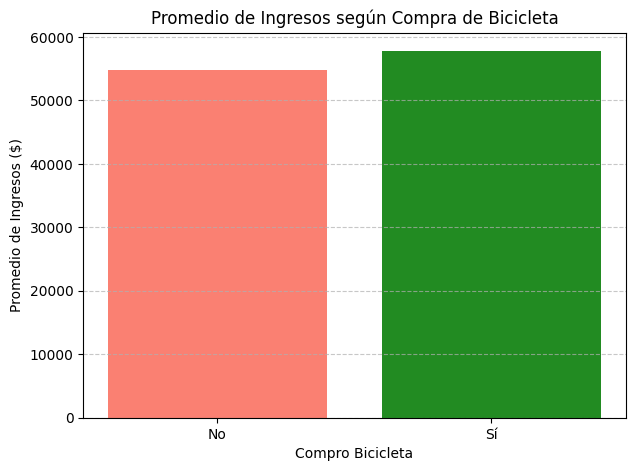

In [23]:
# Average income of the Purchased Bike column
income_per_purchase = df.groupby('Purchased Bike')['Income'].mean().reset_index()
income_per_purchase['Purchased Bike'] = income_per_purchase['Purchased Bike'].map({1: 'Sí', 0: 'No'})
income_per_purchase.columns = ['Compro Bicicleta', 'Promedio de Ingresos']
print(income_per_purchase)

# Visualization
plt.figure(figsize=(7, 5))
plt.bar(income_per_purchase['Compro Bicicleta'], 
        income_per_purchase['Promedio de Ingresos'], 
        color=['salmon', 'forestgreen'])
plt.title('Promedio de Ingresos según Compra de Bicicleta')
plt.ylabel('Promedio de Ingresos ($)')
plt.xlabel('Compro Bicicleta')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2. ¿Cuánto es el promedio de ingresos según el estado civil del cliente?

  Estado Civil  Promedio de Ingresos
0      Married          58646.616541
1       Single          53464.912281


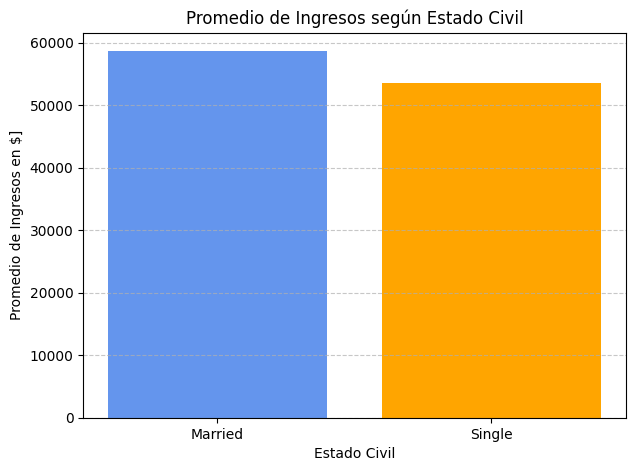

In [24]:
# Average per client Marital Status
income_per_marital_state = df.groupby('Marital Status')['Income'].mean().dropna().reset_index()
income_per_marital_state.columns = ['Estado Civil', 'Promedio de Ingresos']
print(income_per_marital_state)

# Visualization
plt.figure(figsize=(7, 5))
plt.bar(income_per_marital_state['Estado Civil'], 
        income_per_marital_state['Promedio de Ingresos'], 
        color=['cornflowerblue', 'orange'])
plt.title('Promedio de Ingresos según Estado Civil')
plt.ylabel('Promedio de Ingresos en $]')
plt.xlabel('Estado Civil')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

3. Crear una nueva variable llamado Con_hijos, dónde Si: Children > 0, No: Children=0, para los clientes que si tienen hijos ¿Cuánto es el promedio de hijos según el nivel educativo del cliente?

In [25]:
# We create the new variable "Con_Hijos"
# We'll use np.where to assign "Si" if children > 0 and 'No' if its equals to 0
df['Con_hijos'] = np.where(df['Children'] > 0, 'Si', 'No')

       Nivel Educativo  Promedio de Hijos
0          High School           2.776000
1      Graduate Degree           2.748031
2  Partial High School           2.744186
3      Partial College           2.570681
4            Bachelors           2.543103


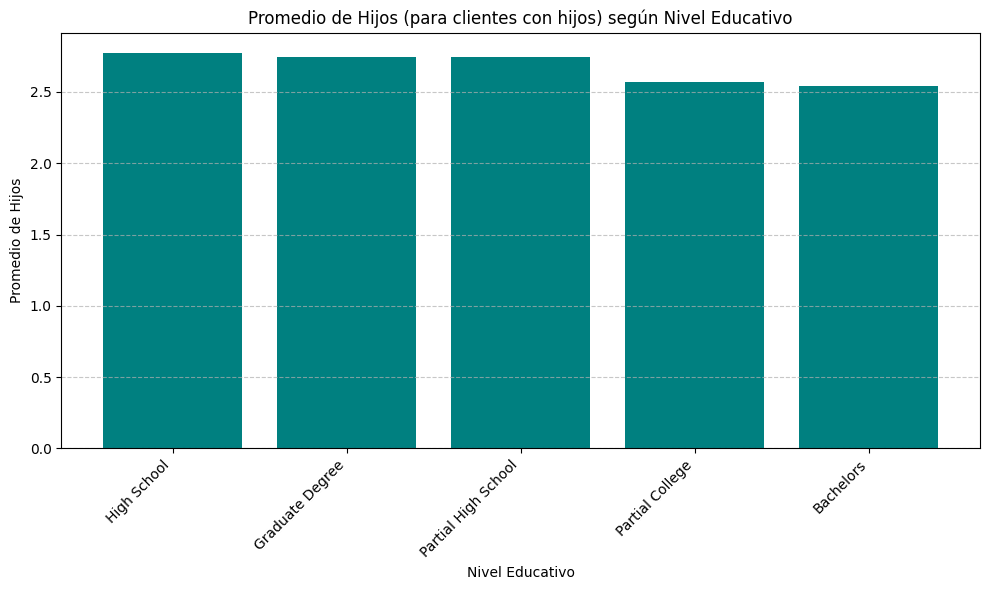

In [26]:
# We filter out by the clients who have children ('Con_Hijos' == Si)
df_con_hijos = df[df['Con_hijos'] == 'Si'].copy()

# Calulate the average per children sorting by education level
avg_children_per_edu = df_con_hijos.groupby('Education')['Children'].mean().sort_values(ascending=False).reset_index()
avg_children_per_edu.columns = ['Nivel Educativo', 'Promedio de Hijos']
print(avg_children_per_edu)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(avg_children_per_edu['Nivel Educativo'], 
        avg_children_per_edu['Promedio de Hijos'], 
        color='teal')
plt.title('Promedio de Hijos (para clientes con hijos) según Nivel Educativo')
plt.ylabel('Promedio de Hijos')
plt.xlabel('Nivel Educativo')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

4. Crear una nueva variable llamado Con_vehiculo, dónde Si: Cars>0, No: Cars=0, para los clientes que si tienen vehículo ¿Cuánto es el promedio de vehículos según la ocupación del cliente?

In [27]:
# I had to do this for some god awful reason
# Imputation to avoid NaN values
# Cars -> Impute NaNs with 0, assuming that a missing value means 0 vehicles
df['Cars_Imputed'] = df['Cars'].fillna(0) 

# Age - > Impute with NaNs too with the median of the columns to avoid bias via outliers
df['Age_Imputed'] = df['Age'].fillna(df['Age'].median()) 

# We finally create the requested variable (Si: Cars > 0 | No: Cars = 0)
df['Con_vehiculo'] = np.where(df['Cars_Imputed'] > 0, 'Si', 'No')

     Ocupación  Promedio de Vehículos
    Management               2.354430
  Professional               2.131222
Skilled Manual               1.723958
      Clerical               1.494845
        Manual               1.447059


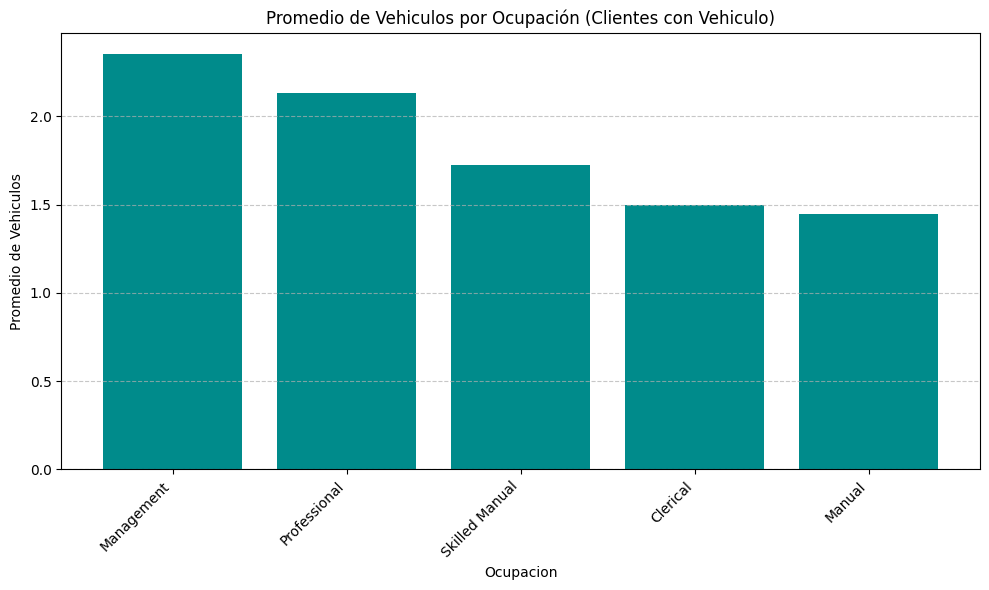

In [28]:
# Filter for clients who have a vehicle (Si)
df_con_vehiculo = df[df['Con_vehiculo'] == 'Si'].copy()

# We calculate the average of vehicles per occupation and sort it out
avg_cars_by_occupation = df_con_vehiculo.groupby('Occupation')['Cars_Imputed'].mean().reset_index()
avg_cars_by_occupation = avg_cars_by_occupation.sort_values(by='Cars_Imputed', ascending=False)
avg_cars_by_occupation.columns = ['Ocupación', 'Promedio de Vehículos']

print(avg_cars_by_occupation.to_string(index=False)) 

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(avg_cars_by_occupation['Ocupación'],
        avg_cars_by_occupation['Promedio de Vehículos'],
        color='darkcyan')
plt.title('Promedio de Vehiculos por Ocupación (Clientes con Vehiculo)')
plt.ylabel('Promedio de Vehiculos')
plt.xlabel('Ocupacion')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

5. ¿Cuánto es el promedio de edad de acuerdo con si el cliente es o no propietario de una vivienda?

Propietario de Vivienda  Promedio de Edad
                     No         42.308917
                     Sí         45.054252


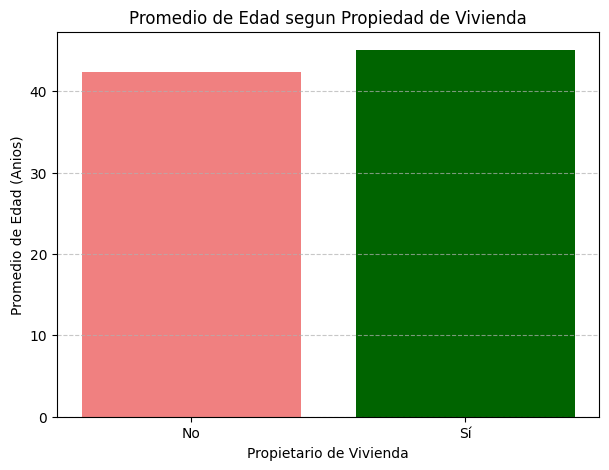

In [29]:
# Average calculation
avg_age_by_homeowner = df.groupby('Home Owner')['Age_Imputed'].mean().reset_index()

# Little utility function to map 'Home Owner' values to 'Si' / 'No' for presentation purposes
def map_home_owner(val):
    if val in [1, 'Yes', 'Sí']: # I hate tildes, they wont work in my holy Linux setup.
        return 'Sí'
    elif val in [0, 'No']:
        return 'No'
    else:
        return 'Missing/Otro'

avg_age_by_homeowner['Home Owner'] = avg_age_by_homeowner['Home Owner'].apply(map_home_owner)
avg_age_by_homeowner.columns = ['Propietario de Vivienda', 'Promedio de Edad']

print(avg_age_by_homeowner.to_string(index=False)) 

# Visualization
plt.figure(figsize=(7, 5))
plt.bar(avg_age_by_homeowner['Propietario de Vivienda'],
        avg_age_by_homeowner['Promedio de Edad'],
        color=['lightcoral', 'darkgreen']) 
plt.title('Promedio de Edad segun Propiedad de Vivienda')
plt.ylabel('Promedio de Edad (Anios)')
plt.xlabel('Propietario de Vivienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: >

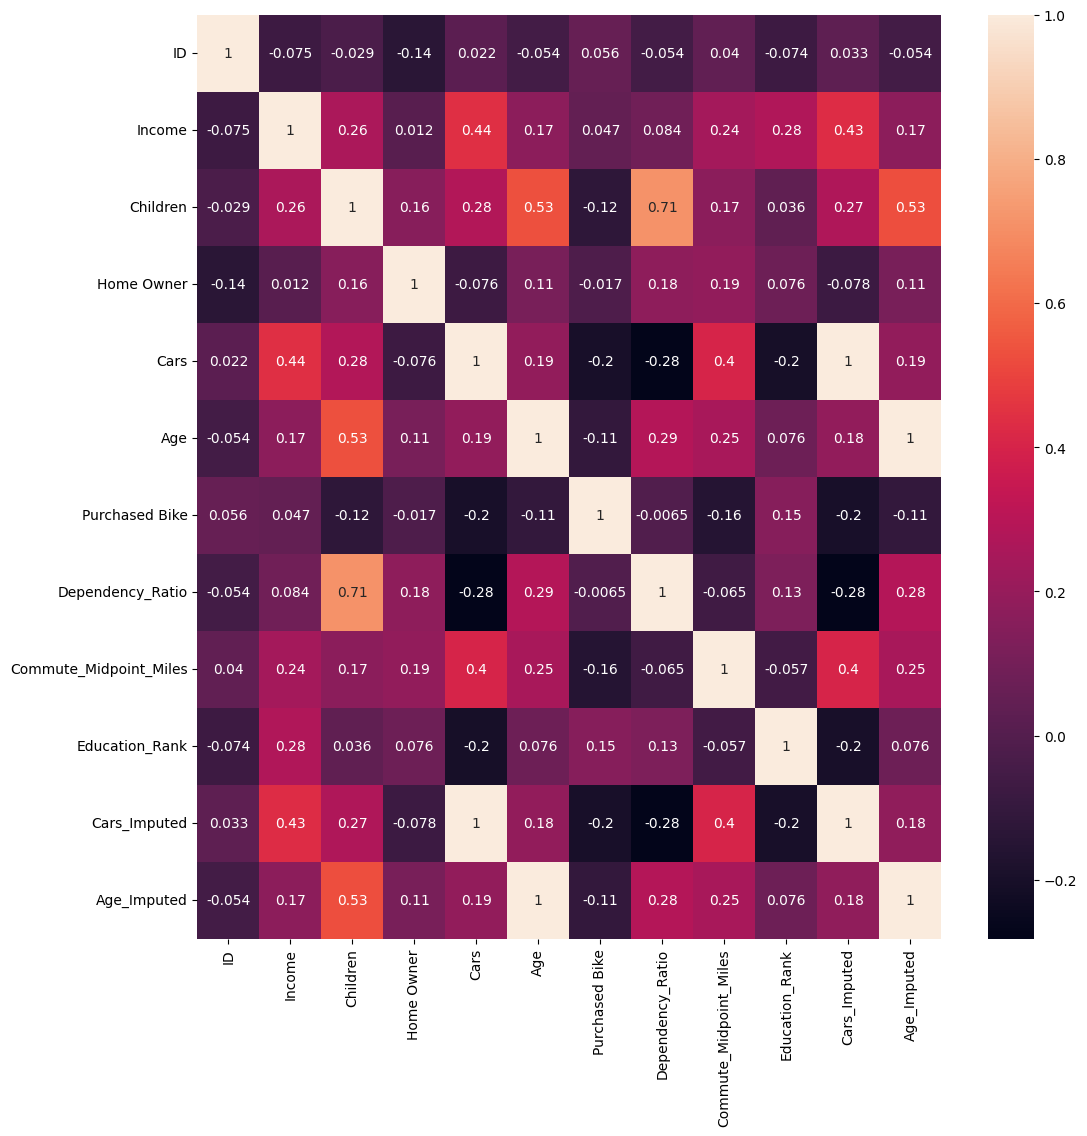

In [39]:
df_num = df.select_dtypes(include=['int64','float64'])
matriz_corr = df_num.corr(method='pearson')
plt.figure(figsize=(12,12))
sns.heatmap(matriz_corr, annot=True)

Columnas después de get_dummies():
Index(['ID', 'Income', 'Children', 'Cars', 'Age', 'score_venta',
       'Marital Status_Single', 'Gender_Male', 'Education_Graduate Degree',
       'Education_High School', 'Education_Partial College',
       'Education_Partial High School', 'Occupation_Management',
       'Occupation_Manual', 'Occupation_Professional',
       'Occupation_Skilled Manual', 'Home Owner_Yes',
       'Commute Distance_1-2 Miles', 'Commute Distance_10+ Miles',
       'Commute Distance_2-5 Miles', 'Commute Distance_5-10 Miles',
       'Region_North America', 'Region_Pacific', 'Purchased Bike_Yes'],
      dtype='object')
Tamaño train: (700, 22)  - Tamaño test: (300, 22)
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Mejores hiperparámetros encontrados:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 0.5, 'max_depth': None}
AUC medio en validación cruzada: 0.980974454714074

AUC en test: 0.9662571225071225

Classification r

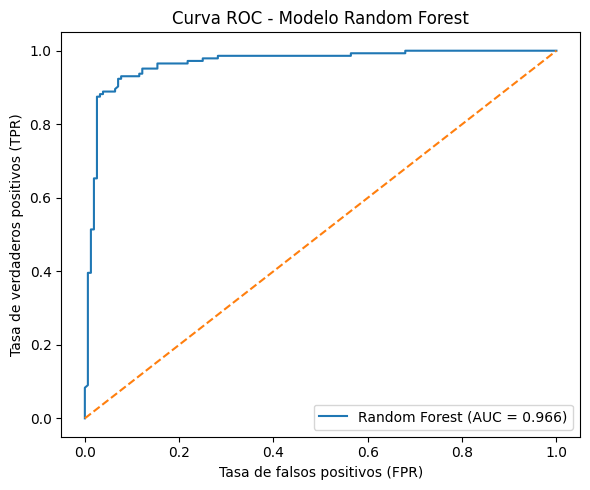

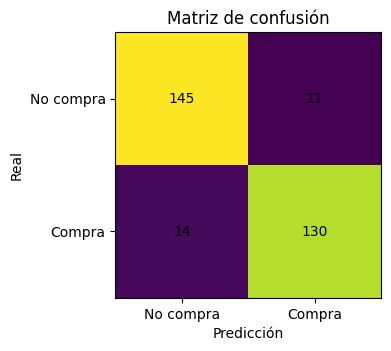

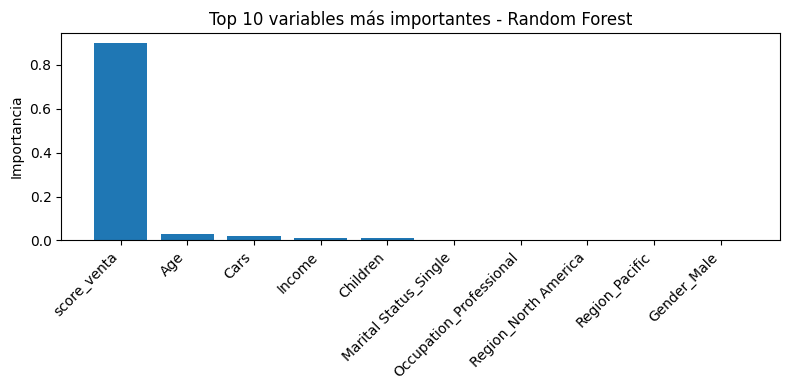


Importancia de variables (top 10):
                    feature  importance
4               score_venta    0.900945
3                       Age    0.031052
2                      Cars    0.019011
0                    Income    0.010581
1                  Children    0.008791
5     Marital Status_Single    0.003381
13  Occupation_Professional    0.003304
20     Region_North America    0.003019
21           Region_Pacific    0.002675
6               Gender_Male    0.002202

Top 10 clientes más propensos a comprar bicicleta:
          ID  score_venta
242  23908.0          1.0
410  20171.0          1.0
7    19364.0          1.0
839  23882.0          1.0
436  19784.0          1.0
189  19482.0          1.0
833  27540.0          1.0
142  14832.0          1.0
694  28068.0          1.0
482  28521.0          1.0


In [46]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    roc_curve,
    confusion_matrix
)

import matplotlib.pyplot as plt

# ============================================================
# 1. ENCODING DE VARIABLES CATEGÓRICAS
# ============================================================

# df_clean: dataframe ya limpio (sin nulos o con nulos imputados)
# One-Hot Encoding para todas las categóricas
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Vemos columnas (opcional, para debug)
print("Columnas después de get_dummies():")
print(df_encoded.columns)

# Tu variable objetivo es la columna binaria de compra:
target_col = "Purchased Bike_Yes"

# ============================================================
# 2. SEPARAR VARIABLES PREDICTORAS (X) Y OBJETIVO (y)
# ============================================================

# Quitamos la columna objetivo y también ID (no aporta al modelo)
cols_to_drop = [target_col]
if "ID" in df_encoded.columns:
    cols_to_drop.append("ID")

X = df_encoded.drop(cols_to_drop, axis=1)
y = df_encoded[target_col]

# ============================================================
# 3. TRAIN / TEST SPLIT
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y  # para mantener proporciones de clases
)

print("Tamaño train:", X_train.shape, " - Tamaño test:", X_test.shape)

# ============================================================
# 4. TUNING DEL RANDOM FOREST CON RANDOMIZEDSEARCHCV
# ============================================================

rf_base = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

# Espacio de hiperparámetros
param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 5, 8, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2", 0.5]
}

search = RandomizedSearchCV(
    rf_base,
    param_distributions=param_dist,
    n_iter=30,              # puedes subirlo si quieres más fino
    scoring="roc_auc",
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)

best_rf = search.best_estimator_

print("\n==============================")
print("Mejores hiperparámetros encontrados:")
print(search.best_params_)
print("AUC medio en validación cruzada:", search.best_score_)
print("==============================\n")

# ============================================================
# 5. EVALUACIÓN EN TEST
# ============================================================

y_pred_prob = best_rf.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

auc_test = roc_auc_score(y_test, y_pred_prob)
print("AUC en test:", auc_test)
print("\nClassification report en test:")
print(classification_report(y_test, y_pred))

# ============================================================
# 6. GRÁFICA ROC
# ============================================================

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_test:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title("Curva ROC - Modelo Random Forest")
plt.legend()
plt.tight_layout()
plt.show()

# ============================================================
# 7. MATRIZ DE CONFUSIÓN (ESTILO HEATMAP SIMPLE)
# ============================================================

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
plt.imshow(cm, interpolation="nearest")
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.xticks([0, 1], ["No compra", "Compra"])
plt.yticks([0, 1], ["No compra", "Compra"])

# anotamos los valores en cada celda
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()

# ============================================================
# 8. IMPORTANCIA DE VARIABLES (TOP 10)
# ============================================================

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]  # de mayor a menor

top_n = 10
top_indices = indices[:top_n]
top_features = X.columns[top_indices]
top_importances = importances[top_indices]

plt.figure(figsize=(8, 4))
plt.bar(range(top_n), top_importances)
plt.xticks(range(top_n), top_features, rotation=45, ha="right")
plt.ylabel("Importancia")
plt.title("Top 10 variables más importantes - Random Forest")
plt.tight_layout()
plt.show()

# También mostramos tabla de importancia
feature_importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values("importance", ascending=False)

print("\nImportancia de variables (top 10):")
print(feature_importance_df.head(10))

# ============================================================
# 9. SCORING DE VENTA PARA TODOS LOS CLIENTES
# ============================================================

# Probabilidad de compra usando TODO el X (train + test)
all_scores = best_rf.predict_proba(X)[:, 1]

# Guardamos en df_clean para poder unir con ID, etc.
df_clean["score_venta"] = all_scores

# TOP 10 clientes más propensos a comprar bicicleta
cols_for_view = ["score_venta"]
if "ID" in df_clean.columns:
    cols_for_view = ["ID", "score_venta"]

top10 = df_clean.sort_values("score_venta", ascending=False).head(10)
print("\nTop 10 clientes más propensos a comprar bicicleta:")
print(top10[cols_for_view])
